In [2]:
!pip install osmnx
!pip install mapclassify
!pip install networkx==3.4.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.6/99.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 5.2 MB/s eta 0:00:00


In [3]:
import sys
import mapclassify

import numpy as np
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from IPython.display import display

In [4]:
city = "Budapest, Hungary"
city = "Buenos Aires, Argentina"
city = "New York, United States"
city = "Madrid, Spain"
city = "Barcelona, Spain"

cities_crs = {
    "Brasília, Brazil": "EPSG:31983",  # SIRGAS 2000 / UTM Zone 23S
    "Canberra, Australia": "EPSG:28356",  # GDA94 / MGA Zone 56
    "Chandigarh, India": "EPSG:32643",  # WGS 84 / UTM Zone 43N
    "Washington, D.C., United States": "EPSG:4269",  # NAD83
    "Dubai, United Arab Emirates": "EPSG:4326",  # WGS 84 (common default)
    "Paris, France": "EPSG:2154",  # RGF93 / Lambert-93
    "Barcelona, Spain": "EPSG:25831",  # ETRS89 / UTM Zone 31N
    "Amsterdam, Netherlands": "EPSG:28992",  # Amersfoort / RD New
    "Vienna, Austria": "EPSG:31287",  # MGI / Austria Lambert
    "Copenhagen, Denmark": "EPSG:25832",  # ETRS89 / UTM Zone 32N
    "Singapore": "EPSG:3414",  # SVY21 / Singapore TM
    "Stockholm, Sweden": "EPSG:3006",  # SWEREF99 TM
    "Putrajaya, Malaysia": "EPSG:3375",  # GDM2000 / Selangor TM
    "Songdo, South Korea": "EPSG:5181",  # Korea 2000 / Unified CS
    "Savannah, Georgia, United States": "EPSG:4269",  # NAD83
}

pair = 'Barcelona, Spain'
crs = cities_crs[pair]

tags = {"boundary": "administrative", "admin_level": "10"}
gdf = ox.features_from_place(pair, tags)
gdf = gdf[gdf.geometry.type.isin(['Polygon', 'MultiPolygon'])]
gdf

geometry  \
element  id                                                            
relation 339972    POLYGON ((2.07556 41.37314, 2.07605 41.37378, ...   
         343436    POLYGON ((2.02179 41.38947, 2.02251 41.3898, 2...   
         345401    POLYGON ((2.08643 41.36658, 2.08667 41.3671, 2...   
         345583    POLYGON ((2.00586 41.42139, 2.00783 41.42208, ...   
         345761    POLYGON ((2.06754 41.34506, 2.06977 41.34483, ...   
...                                                              ...   
         16028944  POLYGON ((2.19938 41.45089, 2.20078 41.45207, ...   
         16028945  POLYGON ((2.19723 41.45269, 2.19856 41.45371, ...   
         16028950  POLYGON ((2.18699 41.46746, 2.18742 41.468, 2....   
         16029012  POLYGON ((2.20641 41.4435, 2.20663 41.44356, 2...   
         16029013  POLYGON ((2.2095 41.43611, 2.20971 41.43622, 2...   

                         boundary  ref admin_level border_type  \
element  id                                                      
relation 339972    administrative  NaN           8    municipi   
         343436    administrative  NaN           8    municipi   
         345401    administrative  NaN           8    municipi   
         345583    administrative  NaN           8    municipi   
         345761    administrative  NaN           8    municipi   
...                           ...  ...         ...         ...   
         16028944  administrative  NaN           9         NaN   
         16028945  administrative  NaN           9         NaN   
         16028950  administrative  NaN           9         NaN   
         16029012  administrative  NaN           9         NaN   
         16029013  administrative  NaN           9         NaN   

                                        name name:an name:ar  \
element  id                                                    
relation 339972       Esplugues de Llobregat     NaN     NaN   
         343436      Sant Feliu de Llobregat     NaN     NaN   
         345401    l'Hospitalet de Llobregat     NaN     NaN   
         345583                Molins de Rei     NaN     NaN   
         345761         el Prat de Llobregat     NaN     NaN   
...                                      ...     ...     ...   
         16028944                   Riu Nord     NaN     NaN   
         16028945                 Singuerlin     NaN     NaN   
         16028950               Les Oliveres     NaN     NaN   
         16029012                      Raval     NaN     NaN   
         16029013                 Safaretjos     NaN     NaN   

                                     name:ca name:de  ... name:tok name:tzl  \
element  id                                           ...                     
relation 339972       Esplugues de Llobregat     NaN  ...      NaN      NaN   
         343436      Sant Feliu de Llobregat     NaN  ...      NaN      NaN   
         345401    l'Hospitalet de Llobregat     NaN  ...      NaN      NaN   
         345583                Molins de Rei     NaN  ...      NaN      NaN   
         345761         el Prat de Llobregat     NaN  ...      NaN      NaN   
...                                      ...     ...  ...      ...      ...   
         16028944                   Riu Nord     NaN  ...      NaN      NaN   
         16028945                 Singuerlín     NaN  ...      NaN      NaN   
         16028950               Les Oliveres     NaN  ...      NaN      NaN   
         16029012                      Raval     NaN  ...      NaN      NaN   
         16029013                 Safaretjos     NaN  ...      NaN      NaN   

                  name:vo ref:nuts:2 source:name:br idescat:comarca  \
element  id                                                           
relation 339972       NaN        NaN            NaN             NaN   
         343436       NaN        NaN            NaN             NaN   
         345401       NaN        NaN            NaN             NaN   
         345583       NaN        NaN            

<ipython-input-5-cf00008809e0>:6: UserWarning: `keep_geom_type=True` in overlay resulted in 32 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  gdf = gpd.overlay(gdf, bp)


<Axes: >

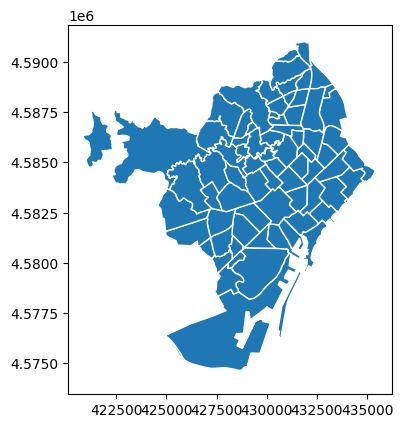

In [5]:
# Define local CRS
crs_barcelona = "EPSG:25831"  # ETRS89 / UTM Zone 31N
crs_madrid = "EPSG:25830"     # ETRS89 / UTM Zone 30N

bp = ox.geocode_to_gdf(pair)
gdf = gpd.overlay(gdf, bp)
gdf = gdf.to_crs(crs)
gdf['area'] = gdf.geometry.area

gdf.plot(edgecolor = 'w')

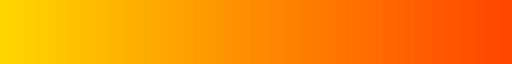

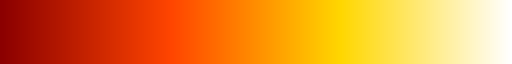

In [6]:
# cmap = mcolors.LinearSegmentedColormap.from_list("blue_pink", ["#4DFFFD", "#ff6ec7"])
# cmap = mcolors.LinearSegmentedColormap.from_list("green_yellow", ["#00FF00", "#FFFF00"])
# cmap = mcolors.LinearSegmentedColormap.from_list("red_black_white", ["#FF0000", "#000000", "#FFFFFF"])
# cmap = mcolors.LinearSegmentedColormap.from_list("ocean", ["#0000FF", "#008080", "#00FF00"])
# cmap = mcolors.LinearSegmentedColormap.from_list("fire", ["#000000", "#FF0000", "#FFFF00", "#FFFFFF"])
# cmap = mcolors.LinearSegmentedColormap.from_list("earth", ["#8B4513", "#228B22", "#4682B4"])
# cmap = mcolors.LinearSegmentedColormap.from_list("cool", ["#800080", "#0000FF", "#00FFFF"])
# cmap = mcolors.LinearSegmentedColormap.from_list("custom_gradient", ["#123456", "#654321", "#abcdef"])
# cmap = mcolors.LinearSegmentedColormap.from_list("pink_purple", ["#FFC0CB", "#800080"])

cmap = mcolors.LinearSegmentedColormap.from_list("sunset", ["#FFD700", "#FF8C00", "#FF4500"])
display(cmap)
cmap = mcolors.LinearSegmentedColormap.from_list("heatmap", ["#8B0000", "#FF4500", "#FFD700", "#FFFFFF"])
display(cmap)

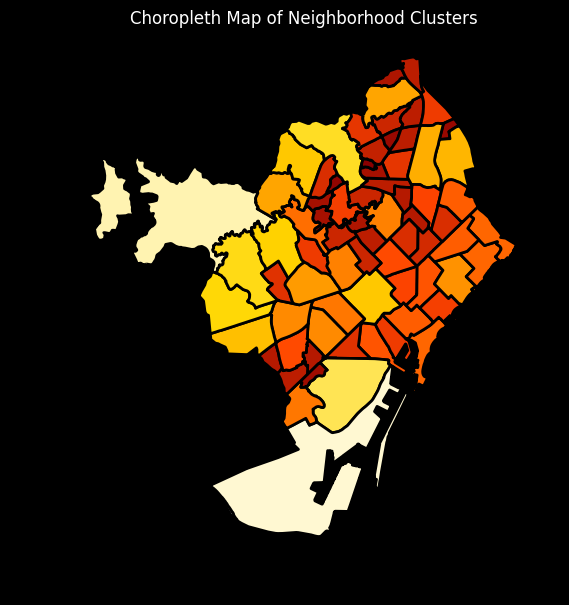

In [7]:
column_to_classify = 'area'
cmap = mcolors.LinearSegmentedColormap.from_list("heatmap", ["#8B0000", "#FF4500", "#FFD700", "#FFFFFF"])

# Classify data
classifier = mapclassify.NaturalBreaks(gdf[column_to_classify], k=50)
gdf['class'] = classifier.yb.astype(int)

# Create the figure with a black background
fig, ax = plt.subplots(1, 1, figsize=(10, 7), facecolor='black')

# Plot the geodataframe
plot = gdf.plot(column='class', cmap=cmap, linewidth=2, edgecolor='k', ax=ax)

# Customize the title and axis
ax.set_title("Choropleth Map of Neighborhood Clusters", color='white')
ax.set_facecolor('k')  # Set the axis background to black
plt.savefig('DAY16.png', dpi = 150, bbox_inches='tight', facecolor = 'k')

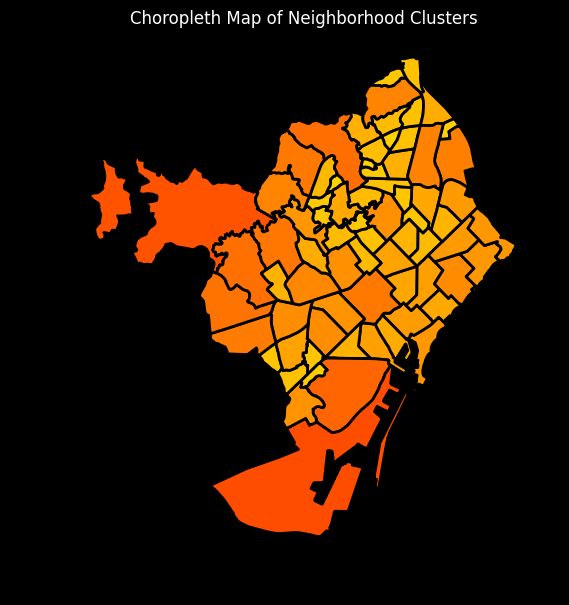

In [8]:
column_to_classify = 'area'
cmap = mcolors.LinearSegmentedColormap.from_list("sunset", ["#FFD700", "#FF8C00", "#FF4500"])

# Classify data
classifier = mapclassify.NaturalBreaks(gdf[column_to_classify], k=50)
gdf['class'] = classifier.yb.astype(int)

# Create the figure with a black background
fig, ax = plt.subplots(1, 1, figsize=(10, 7), facecolor='black')

# Plot the geodataframe
plot = gdf.plot(column='class', cmap=cmap, linewidth=2, edgecolor='k', ax=ax)

# Customize the title and axis
ax.set_title("Choropleth Map of Neighborhood Clusters", color='white')
ax.set_facecolor('k')  # Set the axis background to black
plt.savefig('DAY16.png', dpi = 150, bbox_inches='tight', facecolor = 'k')